In [ ]:
# conda mac 已经不支持 python3.7
# 首先未避免文件位置报错，将SpeakingData.csv、Speaking_FixationReport_Raw.xlsx、Listening_FixationReport_Raw.xlsx移动到代码当前文件加中；或使用文件相对位置、绝对位置
# 在终端中运行：
    # conda create -n py38 python=3.8
    # conda activate py38
    # pip install ipykernel
    # pip install pandas numpy matplotlib seaborn scipy statsmodels pingouin jinja2 openpyxl
    # 终端 jupyter notebook



In [1]:
# case1
import pandas as pd # 导入 Pandas 库
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# 读取 CSV 数据
df = pd.read_csv("SpeakingData.csv") # 读取CSV数据文件为 DataFrame


# 确保必要列的类型正确
df['Preview'] = df['Preview'].astype(str)
df['Complex'] = df['Complex'].astype(str)



### 1️⃣ 第一行：读取 CSV 数据

```python
df = pd.read_csv("SpeakingData.csv")
```

- **功能**：从本地文件 `"SpeakingData.csv"` 中读取数据。
- **工具说明**：
  - `pd` 是 `pandas` 的别名。
  - `read_csv()` 是用于加载 CSV 文件的标准方法。
- **输出对象**：一个名为 `df` 的 DataFrame（表格型结构），便于后续分析。

---

### 2️⃣ 第二至三行：确保列的数据类型正确

```python
df['Preview'] = df['Preview'].astype(str)
df['Complex'] = df['Complex'].astype(str)
```

- **功能**：将 `Preview` 和 `Complex` 列转换为字符串类型。
- **为什么这样做？**
  - 防止因数字、空值或其他类型导致后续文本处理出错。
  - 在导出或展示时保持一致性。
- **补充建议**：
  ```python
  df['Preview'] = df['Preview'].fillna('').astype(str)  # 填充空值后再转为字符串
  ```

---

In [13]:
df.head(2)

,OverallScore,Fluency,Content,Age,EnglishStart,PP,EnglishProfi,SpeakingStimuli,Complex,Preview,...,Words11-20,Words21-30,Words31-40,TotalWords,SpeakingRate,Pause0-10,Pause11-20,Pause21-30,Pause31-40,TotalPauseTimes
0,2.0,2,2,6,Year1,1,1,A1,easy,Yes,...,10,9,9,48,1.23,1,3,1,3,8
1,2.0,2,2,6,Year1,1,1,A2,hard,Yes,...,10,6,11,41,1.07,2,2,3,0,7


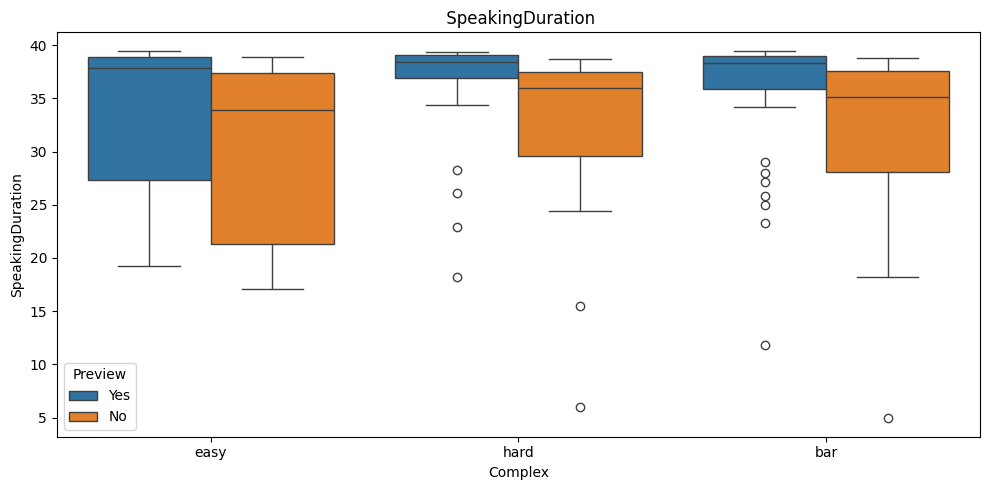

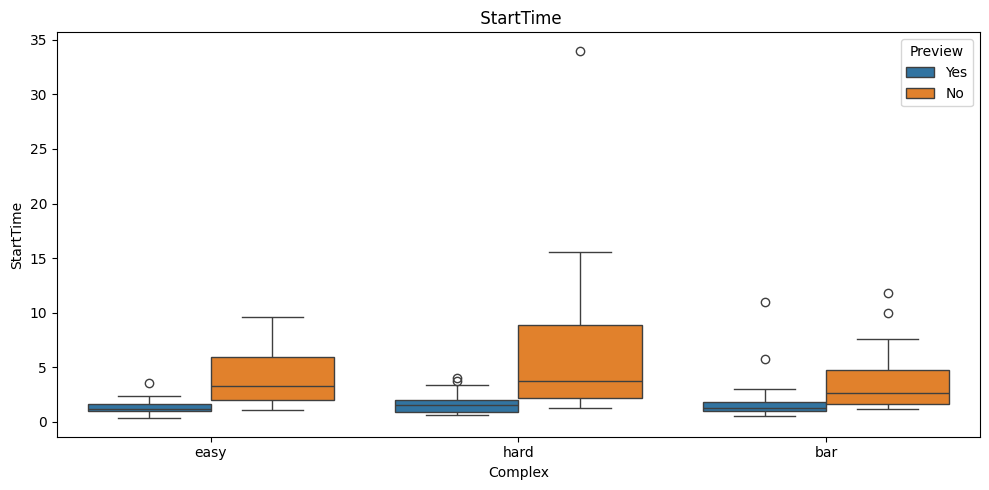

OverallScore 与 StartTime 的皮尔森相关系数为: -0.185
OverallScore 在 Preview 条件下的t检验：t = nan, p = nan
SpeakingDuration 在 Preview 条件下的t检验：t = nan, p = nan
StartTime 在 Preview 条件下的t检验：t = nan, p = nan
OverallScore 在 Complex 条件下的单因素方差分析：F = 2.120, p = 0.123
SpeakingDuration 在 Complex 条件下的单因素方差分析：F = 1.785, p = 0.171
StartTime 在 Complex 条件下的单因素方差分析：F = 2.348, p = 0.098


In [16]:
# 绘制 SpeakingDur 和 StartTime 的箱线图
plt.figure(figsize=(10, 5))
sns.boxplot(x="Complex", y="SpeakingDuration", hue="Preview", data=df)
plt.title(" SpeakingDuration")
plt.xlabel("Complex")
plt.ylabel("SpeakingDuration")
plt.legend(title="Preview")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Complex", y="StartTime", hue="Preview", data=df)
plt.title(" StartTime")
plt.xlabel("Complex")
plt.ylabel("StartTime")
plt.legend(title="Preview")
plt.tight_layout()
plt.show()

# OverallScore 与 StartTime 的相关性分析
corr = df['OverallScore'].corr(df['StartTime'])
print(f"OverallScore 与 StartTime 的皮尔森相关系数为: {corr:.3f}")

# Preview 条件下的 t 检验
group_yes = df[df['Preview'] == 'yes']
group_no = df[df['Preview'] == 'no']

for col in ['OverallScore', 'SpeakingDuration', 'StartTime']:
    t, p = stats.ttest_ind(group_yes[col], group_no[col], equal_var=False)
    print(f"{col} 在 Preview 条件下的t检验：t = {t:.3f}, p = {p:.3f}")

# Complex 条件下的 ANOVA 方差分析
for col in ['OverallScore', 'SpeakingDuration', 'StartTime']:
    samples = [g[col].values for _, g in df.groupby('Complex')]
    f, p = stats.f_oneway(*samples)
    print(f"{col} 在 Complex 条件下的单因素方差分析：F = {f:.3f}, p = {p:.3f}")


## 🔍 逐行解析

### 1️⃣ 设置图像大小

```python
plt.figure(figsize=(10, 5))
```

- **功能**：设置绘图区域的尺寸（宽 x 高），单位为英寸。
- **说明**：
  - `figsize=(10, 5)` 表示图像宽度为 10 英寸，高度为 5 英寸。

---

### 2️⃣ 绘制箱线图

```python
sns.boxplot(x="Complex", y="SpeakingDuration", hue="Preview", data=df)
```

- **功能**：使用 `seaborn` 库绘制分组箱线图。
- **参数说明**：
  - `x="Complex"`：X 轴为 `Complex` 分类变量。
  - `y="SpeakingDuration"`：Y 轴为数值变量 `SpeakingDuration`。
  - `hue="Preview"`：根据 `Preview` 的不同取值进行颜色区分（即分组着色）。
  - `data=df`：数据来源为 DataFrame `df`。

---

### 3️⃣ 添加标题和坐标轴标签

```python
plt.title("SpeakingDuration")
plt.xlabel("Complex")
plt.ylabel("SpeakingDuration")
```

- **功能**：添加图表标题和坐标轴名称。
- **建议命名更清晰**（可选）：
  ```python
  plt.title("Speaking Duration by Complexity and Preview Status")
  plt.xlabel("Complexity Level")
  plt.ylabel("Speaking Duration (seconds)")
  ```

---

### 4️⃣ 设置图例标题

```python
plt.legend(title="Preview")
```

- **功能**：为图例设置标题。
- **默认行为**：若不指定 `title`，图例标题将为空。

---

### 5️⃣ 自动调整布局并显示图像

```python
plt.tight_layout()
plt.show()
```

- **功能**：
  - `tight_layout()`：自动调整子图参数以防止重叠。
  - `show()`：在 notebook 中显示当前图像。

---

## 🧠 小贴士

- 如果图像显示模糊或字体过小，可以设置 DPI：
  ```python
  plt.figure(figsize=(10, 5), dpi=100)
  ```
- 若想保存图像到文件：
  ```python
  plt.savefig("boxplot_speaking_duration.png", bbox_inches='tight')
  ```

---

## 🔍 分析模块详解

### 1️⃣ 皮尔森相关性分析（Pearson Correlation）

```python
corr = df['OverallScore'].corr(df['StartTime'])
print(f"OverallScore 与 StartTime 的皮尔森相关系数为: {corr:.3f}")
```

- **功能**：
  - 计算 `OverallScore` 和 `StartTime` 之间的皮尔森相关系数。
  - 打印结果，保留三位小数。
- **说明**：
  - 值域范围：[-1, 1]
    - 接近 1：强正相关
    - 接近 -1：强负相关
    - 接近 0：无线性关系
  - 适用于连续变量间的线性关系判断。

---

### 2️⃣ 独立样本 t 检验（Independent t-test）

```python
group_yes = df[df['Preview'] == 'yes']
group_no = df[df['Preview'] == 'no']
```

- **功能**：根据 `Preview` 列的值 `'yes'` 和 `'no'` 将数据分为两组。

```python
for col in ['OverallScore', 'SpeakingDuration', 'StartTime']:
    t, p = stats.ttest_ind(group_yes[col], group_no[col], equal_var=False)
    print(f"{col} 在 Preview 条件下的t检验：t = {t:.3f}, p = {p:.3f}")
```

- **功能**：
  - 对每列在两个组间进行独立样本 t 检验。
  - `equal_var=False` 表示使用 Welch’s t-test（不假设方差齐性）。
- **输出解释**：
  - `t`：t 统计量，表示两组均值差异的方向和大小。
  - `p`：显著性水平，通常以 0.05 作为阈值判断是否拒绝原假设（即“两组无差异”）。

---

### 3️⃣ 单因素方差分析（One-way ANOVA）

```python
for col in ['OverallScore', 'SpeakingDuration', 'StartTime']:
    samples = [g[col].values for _, g in df.groupby('Complex')]
    f, p = stats.f_oneway(*samples)
    print(f"{col} 在 Complex 条件下的单因素方差分析：F = {f:.3f}, p = {p:.3f}")
```

- **功能**：
  - 根据 `Complex` 分组，对每个指定列执行单因素方差分析。
  - `f_oneway()` 返回 F 值和 p 值。
- **输出解释**：
  - `F`：F 统计量，反映组间变异与组内变异的比值。
  - `p`：判断组间是否存在显著差异的标准。

---